In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns 
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
import pickle
sns.set(rc={"figure.figsize": [9,9]}, font_scale=1.5)

In [2]:
df=pd.read_csv(r"C:\Users\mahmoud\Desktop\Cellula intern\first inten project.csv")

In [3]:
df.sample(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
25567,INN25568,2,0,3,7,Not Selected,0,Room_Type 1,261,Online,0,0,0,68.51,0,12/26/2018,Canceled
1198,INN01199,2,0,2,5,Meal Plan 1,0,Room_Type 1,85,Online,0,0,0,90.95,0,4/13/2018,Canceled
6161,INN06162,2,0,2,2,Meal Plan 1,0,Room_Type 4,50,Online,0,0,0,82.45,0,3/11/2018,Canceled
6116,INN06117,2,0,0,1,Meal Plan 1,0,Room_Type 1,9,Online,0,0,0,139.00,1,7/6/2018,Not_Canceled
28656,INN28657,3,0,0,5,Meal Plan 1,0,Room_Type 4,89,Online,0,0,0,150.30,0,8/23/2018,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [6]:
df.columns=df.columns.str.strip().str.replace(" ","_").str.replace("-","_").str.lower()


In [7]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p_c                       36285 non-null  int64  
 12  p_not_c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [9]:
df=df.convert_dtypes()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  string 
 1   number_of_adults          36285 non-null  Int64  
 2   number_of_children        36285 non-null  Int64  
 3   number_of_weekend_nights  36285 non-null  Int64  
 4   number_of_week_nights     36285 non-null  Int64  
 5   type_of_meal              36285 non-null  string 
 6   car_parking_space         36285 non-null  Int64  
 7   room_type                 36285 non-null  string 
 8   lead_time                 36285 non-null  Int64  
 9   market_segment_type       36285 non-null  string 
 10  repeated                  36285 non-null  Int64  
 11  p_c                       36285 non-null  Int64  
 12  p_not_c                   36285 non-null  Int64  
 13  average_price             36285 non-null  Float64
 14  specia

In [11]:
df.head(5)

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.0,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.0,0,4/11/2018,Canceled


In [12]:
df["number_of_total_individuals"]=df["number_of_adults"]+df["number_of_children"]
df["number_of_nights"]=df["number_of_week_nights"]+df["number_of_weekend_nights"]


In [13]:
df.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,date_of_reservation,booking_status,number_of_total_individuals,number_of_nights
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,10/2/2015,Not_Canceled,2,7
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,1,4
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.0,0,2/28/2018,Canceled,3,4
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,5/20/2017,Canceled,1,2
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.0,0,4/11/2018,Canceled,1,3


In [14]:
df["date_of_reservation"]=pd.to_datetime(df["date_of_reservation"],format='%m/%d/%Y',errors="coerce")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   36285 non-null  string        
 1   number_of_adults             36285 non-null  Int64         
 2   number_of_children           36285 non-null  Int64         
 3   number_of_weekend_nights     36285 non-null  Int64         
 4   number_of_week_nights        36285 non-null  Int64         
 5   type_of_meal                 36285 non-null  string        
 6   car_parking_space            36285 non-null  Int64         
 7   room_type                    36285 non-null  string        
 8   lead_time                    36285 non-null  Int64         
 9   market_segment_type          36285 non-null  string        
 10  repeated                     36285 non-null  Int64         
 11  p_c                          36285 non-nu

In [16]:
df.isna().sum()

booking_id                      0
number_of_adults                0
number_of_children              0
number_of_weekend_nights        0
number_of_week_nights           0
type_of_meal                    0
car_parking_space               0
room_type                       0
lead_time                       0
market_segment_type             0
repeated                        0
p_c                             0
p_not_c                         0
average_price                   0
special_requests                0
date_of_reservation            37
booking_status                  0
number_of_total_individuals     0
number_of_nights                0
dtype: int64

In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   36248 non-null  string        
 1   number_of_adults             36248 non-null  Int64         
 2   number_of_children           36248 non-null  Int64         
 3   number_of_weekend_nights     36248 non-null  Int64         
 4   number_of_week_nights        36248 non-null  Int64         
 5   type_of_meal                 36248 non-null  string        
 6   car_parking_space            36248 non-null  Int64         
 7   room_type                    36248 non-null  string        
 8   lead_time                    36248 non-null  Int64         
 9   market_segment_type          36248 non-null  string        
 10  repeated                     36248 non-null  Int64         
 11  p_c                          36248 non-null  I

In [19]:
df.isna().sum()

booking_id                     0
number_of_adults               0
number_of_children             0
number_of_weekend_nights       0
number_of_week_nights          0
type_of_meal                   0
car_parking_space              0
room_type                      0
lead_time                      0
market_segment_type            0
repeated                       0
p_c                            0
p_not_c                        0
average_price                  0
special_requests               0
date_of_reservation            0
booking_status                 0
number_of_total_individuals    0
number_of_nights               0
dtype: int64

In [20]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights'],
      dtype='object')

In [21]:
df["day_name"]=df["date_of_reservation"].dt.day_name()
df["month"]=df["date_of_reservation"].dt.month
df["year"]=df["date_of_reservation"].dt.year


In [22]:
df.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,...,p_not_c,average_price,special_requests,date_of_reservation,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,88.0,0,2015-10-02,Not_Canceled,2,7,Friday,10,2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,106.68,1,2018-11-06,Not_Canceled,1,4,Tuesday,11,2018
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,50.0,0,2018-02-28,Canceled,3,4,Wednesday,2,2018
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,100.0,1,2017-05-20,Canceled,1,2,Saturday,5,2017
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,77.0,0,2018-04-11,Canceled,1,3,Wednesday,4,2018


In [23]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [24]:
df["type_of_meal"].unique()

<StringArray>
['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Length: 4, dtype: string

In [25]:
df["room_type"].unique()

<StringArray>
['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5',
 'Room_Type 7', 'Room_Type 3']
Length: 7, dtype: string

In [26]:
df["market_segment_type"].unique()

<StringArray>
['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
Length: 5, dtype: string

In [27]:
df["special_requests"].unique()

<IntegerArray>
[0, 1, 3, 2, 4, 5]
Length: 6, dtype: Int64

In [28]:
df["booking_status"].unique()

<StringArray>
['Not_Canceled', 'Canceled']
Length: 2, dtype: string

In [29]:
df["number_of_total_individuals"].unique()

<IntegerArray>
[2, 1, 3, 4, 5, 12, 10, 11]
Length: 8, dtype: Int64

In [30]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [31]:
df.drop(["booking_id","number_of_adults","number_of_children","number_of_weekend_nights","number_of_week_nights","date_of_reservation"],axis=1,inplace=True)

In [32]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

<Axes: >

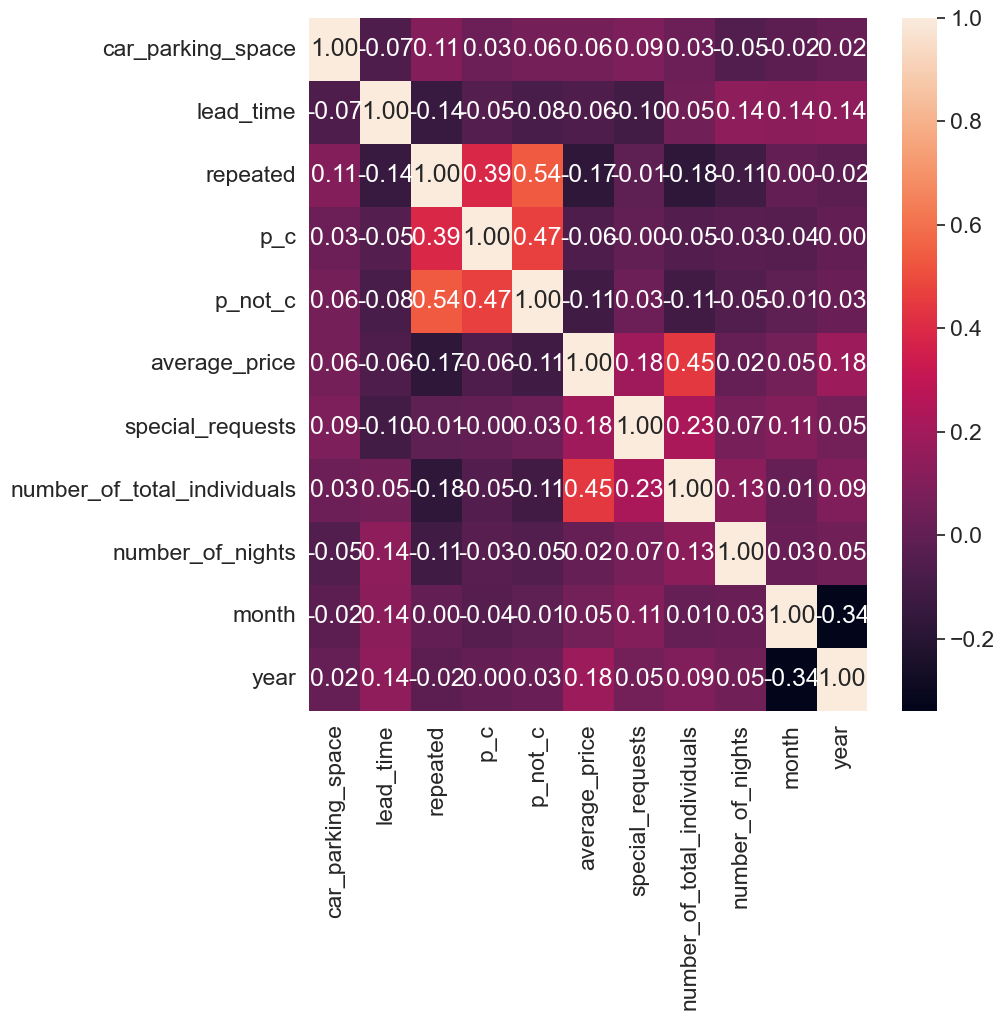

In [33]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f")

<Axes: >

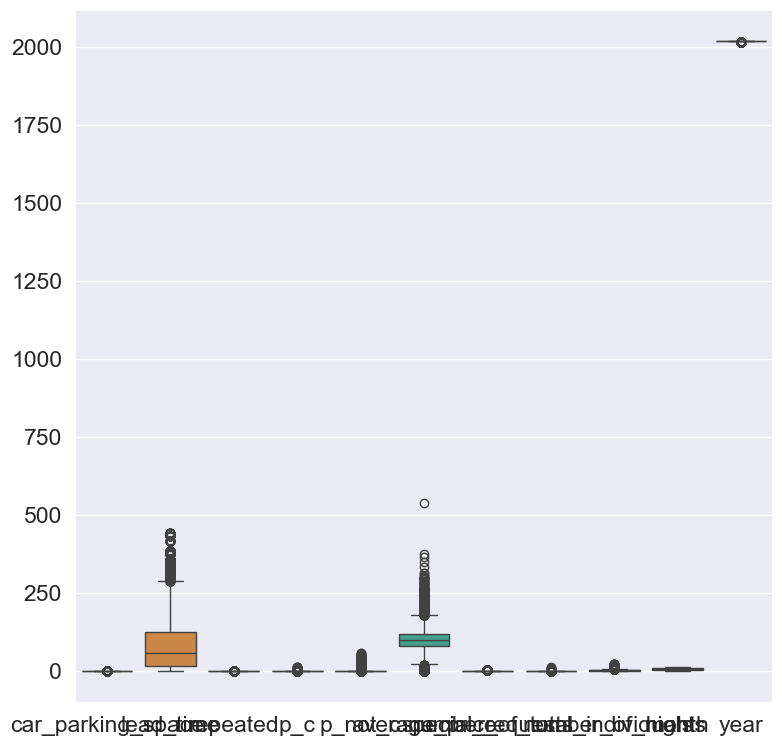

In [34]:
sns.boxplot(df)

In [35]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [36]:
px.box(df,x=df["average_price"])

In [37]:
df[df["average_price"]==df["average_price"].max()]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
33114,Meal Plan 1,0,Room_Type 1,35,Offline,0,0,0,540.0,0,Canceled,2,1,Sunday,3,2018


In [38]:
df[df["average_price"]>=179.5].shape[0]

1067

In [39]:
df[df["average_price"]==375.5]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
9461,Meal Plan 1,0,Room_Type 4,21,Online,0,0,0,375.5,0,Not_Canceled,3,2,Sunday,12,2018


In [40]:
df[df["average_price"]>=179.5].year.unique()

array([2018, 2017])

In [41]:
df.groupby("year")[["average_price"]].mean()

,average_price
year,
2015,88.0
2016,100.0
2017,90.032118
2018,106.373606


In [42]:
index=detect_outliers(df,0,["average_price"])
df.loc[index, "average_price"] = df["average_price"].median()

In [43]:
px.box(df,x=df["average_price"])

In [44]:
px.box(df,x=df["lead_time"])

In [45]:
df[df["lead_time"]>=290].shape[0]

1332

In [46]:
df[(df["lead_time"]>=290)&(df["booking_status"]=="Not_Canceled")].shape[0]

262

In [47]:
df[(df["lead_time"]>=290)&(df["booking_status"]=="Canceled")].shape[0]

1070

In [48]:
df["lead_time"].nunique()

352

In [49]:
px.histogram(df,x=df["lead_time"])

In [50]:
df.groupby(df["lead_time"])[["lead_time"]].count()

,lead_time
lead_time,
0,1295
1,1078
2,643
3,626
4,627
...,...
381,2
386,69
418,60


In [51]:
def leadtimehandling(leadtime):
    if leadtime <= 1:
        return "Same Day"
    elif leadtime <= 7:
        return "Short Notice"
    elif leadtime <=30 :
        return "Medium Term"
    elif leadtime <= 365 :
        return "Long Term"
    else:
         return "Very Long Term"

df["lead_time"]=df["lead_time"].apply(leadtimehandling)

In [52]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,7,Friday,10,2015
1,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,4,Tuesday,11,2018
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,4,Wednesday,2,2018
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,2,Saturday,5,2017
4,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,3,Wednesday,4,2018


In [53]:
df["lead_time"].unique()

array(['Long Term', 'Short Notice', 'Same Day', 'Medium Term',
       'Very Long Term'], dtype=object)

In [54]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

<Axes: >

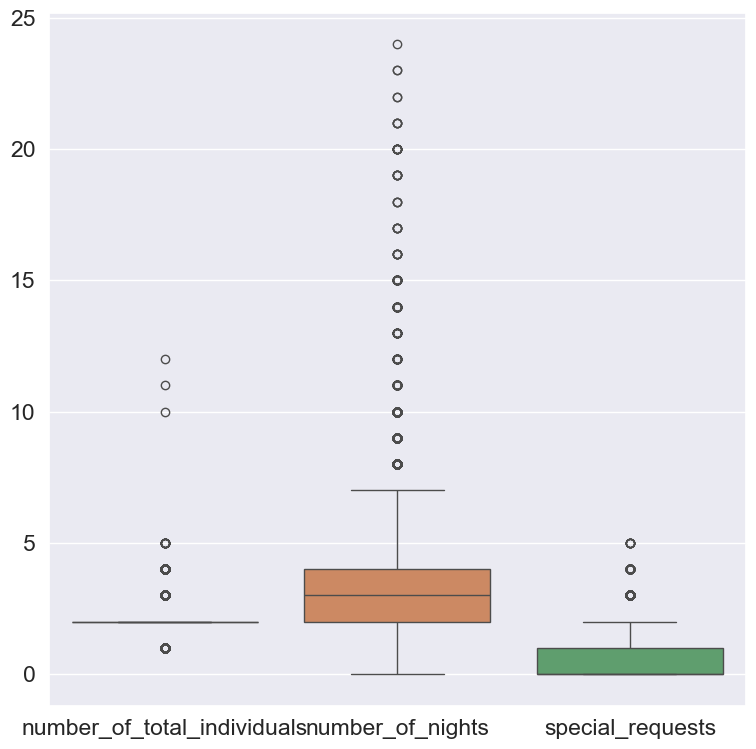

In [55]:
sns.boxplot(df[["number_of_total_individuals","number_of_nights","special_requests"]])

In [56]:
px.box(df,x=df["number_of_nights"])

In [57]:
df[df["number_of_nights"]==24]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
19512,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,90.95,1,Canceled,2,24,Wednesday,7,2018


In [58]:
sorted(df["number_of_nights"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [59]:
df.groupby(df["number_of_nights"])["p_c"].count()

number_of_nights
0        78
1      6600
2      8467
3     10042
4      5887
5      2590
6      1028
7       974
8       179
9       111
10      108
11       39
12       24
13       18
14       32
15       31
16        6
17        5
18        3
19        6
20       11
21        4
22        2
23        2
24        1
Name: p_c, dtype: Int64

In [60]:
def stay_bin(x):
    if x == 0:
        return "Day Use"
    elif x <= 3:
        return "Short Stay"
    elif x <= 7:
        return "Week Stay"
    elif x <= 14:
        return "Two Weeks Stay"
    else:
        return "Long Stay"
df["number_of_nights"] = df["number_of_nights"].apply(stay_bin)


In [61]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015
1,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,Short Stay,Saturday,5,2017
4,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018


In [62]:
df.groupby(df["number_of_total_individuals"])["p_c"].count()

number_of_total_individuals
1      7537
2     23933
3      3850
4       910
5        15
10        1
11        1
12        1
Name: p_c, dtype: Int64

In [63]:
px.box(df,x=df["number_of_total_individuals"])

In [64]:
df[df["number_of_total_individuals"].isin([10, 11, 12])]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
6338,Meal Plan 1,0,Room_Type 4,Long Term,Online,0,0,0,84.45,1,Not_Canceled,12,Short Stay,Friday,1,2018
10041,Meal Plan 1,0,Room_Type 1,Medium Term,Corporate,0,0,0,95.0,0,Not_Canceled,10,Short Stay,Wednesday,10,2017
10061,Meal Plan 1,0,Room_Type 2,Medium Term,Online,0,0,0,76.5,1,Canceled,11,Week Stay,Sunday,8,2017


In [65]:
def group_large(x):
    if x > 5:
        return "Group"
    return x

df["number_of_total_individuals"] = df["number_of_total_individuals"].apply(group_large)


In [66]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015
1,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,Short Stay,Saturday,5,2017
4,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018


In [67]:
df[df["number_of_total_individuals"]=="Group"]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
6338,Meal Plan 1,0,Room_Type 4,Long Term,Online,0,0,0,84.45,1,Not_Canceled,Group,Short Stay,Friday,1,2018
10041,Meal Plan 1,0,Room_Type 1,Medium Term,Corporate,0,0,0,95.0,0,Not_Canceled,Group,Short Stay,Wednesday,10,2017
10061,Meal Plan 1,0,Room_Type 2,Medium Term,Online,0,0,0,76.5,1,Canceled,Group,Week Stay,Sunday,8,2017


In [68]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'repeated', 'p_c', 'p_not_c', 'average_price',
       'special_requests', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [69]:
df["special_requests"].unique()

<IntegerArray>
[0, 1, 3, 2, 4, 5]
Length: 6, dtype: Int64

In [70]:
df.groupby("special_requests")[["p_c"]].count()

,p_c
special_requests,
0,19754
1,11369
2,4363
3,676
4,78
5,8


In [71]:
px.histogram(df,x=df["special_requests"],color=df["booking_status"])

In [72]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015
1,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,Short Stay,Saturday,5,2017
4,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018


In [73]:
px.histogram(df,x=df["car_parking_space"],color=df["booking_status"])

In [74]:
df.groupby("car_parking_space")["booking_status"].value_counts(normalize=True)


car_parking_space  booking_status
0                  Not_Canceled      0.664987
                   Canceled          0.335013
1                  Not_Canceled      0.898305
                   Canceled          0.101695
Name: proportion, dtype: float64

In [75]:
df.groupby("repeated")["booking_status"].value_counts(normalize=True)


repeated  booking_status
0         Not_Canceled      0.664034
          Canceled          0.335966
1         Not_Canceled      0.983801
          Canceled          0.016199
Name: proportion, dtype: float64

In [76]:
px.histogram(df,x=df["repeated"],color=df["booking_status"])

In [77]:
df.groupby("p_c")["booking_status"].value_counts()


p_c  booking_status
0    Not_Canceled      24044
     Canceled          11867
1    Not_Canceled        187
     Canceled             10
2    Not_Canceled         46
3    Not_Canceled         42
     Canceled              1
4    Not_Canceled         10
5    Not_Canceled         11
6    Not_Canceled          1
11   Not_Canceled         25
13   Canceled              4
Name: count, dtype: int64

In [78]:
px.histogram(df,x=df["p_c"],color=df["booking_status"])

In [79]:
px.histogram(df,x=df["p_c"],color=df["booking_status"])

In [80]:
df["p_c"].value_counts().sort_index()

p_c
0     35911
1       197
2        46
3        43
4        10
5        11
6         1
11       25
13        4
Name: count, dtype: Int64

In [81]:
df[df["repeated"]==1]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
88,Not Selected,0,Room_Type 1,Medium Term,Online,1,0,5,95.0,0,Not_Canceled,2,Short Stay,Monday,12,2018
145,Meal Plan 1,0,Room_Type 1,Medium Term,Complementary,1,3,5,99.45,1,Not_Canceled,1,Short Stay,Friday,6,2018
155,Meal Plan 1,0,Room_Type 1,Short Notice,Corporate,1,1,5,65.0,1,Not_Canceled,1,Short Stay,Thursday,11,2018
266,Meal Plan 1,0,Room_Type 1,Same Day,Complementary,1,0,1,99.45,1,Not_Canceled,1,Short Stay,Saturday,8,2017
288,Meal Plan 1,0,Room_Type 2,Medium Term,Complementary,1,0,3,99.45,1,Not_Canceled,2,Short Stay,Friday,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,Meal Plan 1,1,Room_Type 1,Short Notice,Corporate,1,0,8,67.0,1,Not_Canceled,1,Short Stay,Wednesday,6,2018
36029,Meal Plan 1,1,Room_Type 1,Short Notice,Corporate,1,0,3,67.0,1,Not_Canceled,1,Short Stay,Thursday,9,2018
36079,Not Selected,1,Room_Type 1,Same Day,Online,1,11,0,77.5,0,Not_Canceled,1,Short Stay,Sunday,1,2018
36080,Meal Plan 1,0,Room_Type 7,Same Day,Complementary,1,3,15,99.45,1,Not_Canceled,1,Short Stay,Wednesday,3,2018


In [82]:
df["repeated"].value_counts().sort_index()

repeated
0    35322
1      926
Name: count, dtype: Int64

In [83]:
df[(df["p_c"]==0)  & (df["p_not_c"]>1)]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
88,Not Selected,0,Room_Type 1,Medium Term,Online,1,0,5,95.0,0,Not_Canceled,2,Short Stay,Monday,12,2018
288,Meal Plan 1,0,Room_Type 2,Medium Term,Complementary,1,0,3,99.45,1,Not_Canceled,2,Short Stay,Friday,9,2018
321,Meal Plan 1,0,Room_Type 1,Long Term,Corporate,1,0,3,65.0,0,Not_Canceled,1,Short Stay,Tuesday,5,2018
346,Meal Plan 1,0,Room_Type 1,Short Notice,Complementary,1,0,4,99.45,4,Not_Canceled,1,Short Stay,Friday,8,2018
351,Meal Plan 1,1,Room_Type 4,Short Notice,Corporate,1,0,3,103.0,1,Not_Canceled,1,Short Stay,Sunday,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35733,Meal Plan 1,1,Room_Type 4,Same Day,Offline,1,0,7,45.0,2,Not_Canceled,2,Short Stay,Thursday,3,2018
35798,Meal Plan 1,0,Room_Type 1,Same Day,Corporate,1,0,3,65.0,0,Not_Canceled,1,Short Stay,Wednesday,3,2018
35880,Meal Plan 1,0,Room_Type 1,Short Notice,Corporate,1,0,10,66.0,1,Not_Canceled,1,Short Stay,Saturday,2,2018
35999,Meal Plan 1,1,Room_Type 1,Short Notice,Corporate,1,0,8,67.0,1,Not_Canceled,1,Short Stay,Wednesday,6,2018


In [84]:
df[(df["p_c"]==0)  & (df["p_not_c"]==0)]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015
1,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,Short Stay,Saturday,5,2017
4,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,Meal Plan 2,0,Room_Type 1,Long Term,Online,0,0,0,115.0,1,Canceled,2,Short Stay,Thursday,9,2018
36281,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,107.55,1,Not_Canceled,2,Week Stay,Sunday,10,2017
36282,Meal Plan 1,0,Room_Type 4,Long Term,Online,0,0,0,105.61,1,Not_Canceled,2,Week Stay,Wednesday,12,2018
36283,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,96.9,1,Not_Canceled,3,Week Stay,Friday,7,2018


In [85]:
df['cancellation_ratio'] = df.apply(
    lambda row: 0 if row["repeated"] == 0 else row['p_c'] / (row['p_c'] + row['p_not_c']),
    axis=1
)

In [86]:
df.tail()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio
36280,Meal Plan 2,0,Room_Type 1,Long Term,Online,0,0,0,115.0,1,Canceled,2,Short Stay,Thursday,9,2018,0.0
36281,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,107.55,1,Not_Canceled,2,Week Stay,Sunday,10,2017,0.0
36282,Meal Plan 1,0,Room_Type 4,Long Term,Online,0,0,0,105.61,1,Not_Canceled,2,Week Stay,Wednesday,12,2018,0.0
36283,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,96.9,1,Not_Canceled,3,Week Stay,Friday,7,2018,0.0
36284,Meal Plan 1,0,Room_Type 4,Long Term,Online,0,0,0,133.44,3,Not_Canceled,2,Week Stay,Thursday,10,2018,0.0


In [87]:
df[df["repeated"]==1]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio
88,Not Selected,0,Room_Type 1,Medium Term,Online,1,0,5,95.0,0,Not_Canceled,2,Short Stay,Monday,12,2018,0.000000
145,Meal Plan 1,0,Room_Type 1,Medium Term,Complementary,1,3,5,99.45,1,Not_Canceled,1,Short Stay,Friday,6,2018,0.375000
155,Meal Plan 1,0,Room_Type 1,Short Notice,Corporate,1,1,5,65.0,1,Not_Canceled,1,Short Stay,Thursday,11,2018,0.166667
266,Meal Plan 1,0,Room_Type 1,Same Day,Complementary,1,0,1,99.45,1,Not_Canceled,1,Short Stay,Saturday,8,2017,0.000000
288,Meal Plan 1,0,Room_Type 2,Medium Term,Complementary,1,0,3,99.45,1,Not_Canceled,2,Short Stay,Friday,9,2018,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,Meal Plan 1,1,Room_Type 1,Short Notice,Corporate,1,0,8,67.0,1,Not_Canceled,1,Short Stay,Wednesday,6,2018,0.000000
36029,Meal Plan 1,1,Room_Type 1,Short Notice,Corporate,1,0,3,67.0,1,Not_Canceled,1,Short Stay,Thursday,9,2018,0.000000
36079,Not Selected,1,Room_Type 1,Same Day,Online,1,11,0,77.5,0,Not_Canceled,1,Short Stay,Sunday,1,2018,1.000000
36080,Meal Plan 1,0,Room_Type 7,Same Day,Complementary,1,3,15,99.45,1,Not_Canceled,1,Short Stay,Wednesday,3,2018,0.166667


In [88]:
df['first_time_visitor'] = (1 - df['repeated'])

In [89]:
df.sample(7)

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio,first_time_visitor
15820,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,46.63,1,Not_Canceled,1,Week Stay,Saturday,12,2017,0.0,1
9722,Not Selected,0,Room_Type 1,Medium Term,Online,0,0,0,139.0,2,Not_Canceled,1,Short Stay,Saturday,9,2018,0.0,1
14170,Meal Plan 1,0,Room_Type 1,Medium Term,Online,0,0,0,117.9,1,Not_Canceled,2,Short Stay,Wednesday,5,2018,0.0,1
14005,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,90.0,0,Canceled,2,Week Stay,Friday,5,2018,0.0,1
35153,Meal Plan 1,0,Room_Type 1,Medium Term,Online,0,0,0,105.0,1,Not_Canceled,1,Short Stay,Tuesday,5,2018,0.0,1
18861,Meal Plan 1,0,Room_Type 4,Same Day,Online,0,0,0,128.52,0,Not_Canceled,3,Week Stay,Monday,12,2018,0.0,1
34707,Meal Plan 1,0,Room_Type 1,Medium Term,Offline,0,0,0,38.67,1,Not_Canceled,2,Short Stay,Tuesday,12,2017,0.0,1


In [90]:
df.drop(['p_c', 'p_not_c', 'repeated'], axis=1, inplace=True)

In [91]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio,first_time_visitor
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015,0.0,1
1,Not Selected,0,Room_Type 1,Short Notice,Online,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018,0.0,1
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018,0.0,1
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,100.0,1,Canceled,1,Short Stay,Saturday,5,2017,0.0,1
4,Not Selected,0,Room_Type 1,Long Term,Online,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018,0.0,1


In [92]:
df["cancellation_ratio"]=df["cancellation_ratio"].round(2)

In [93]:
df[df["first_time_visitor"]==0]

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio,first_time_visitor
88,Not Selected,0,Room_Type 1,Medium Term,Online,95.0,0,Not_Canceled,2,Short Stay,Monday,12,2018,0.00,0
145,Meal Plan 1,0,Room_Type 1,Medium Term,Complementary,99.45,1,Not_Canceled,1,Short Stay,Friday,6,2018,0.38,0
155,Meal Plan 1,0,Room_Type 1,Short Notice,Corporate,65.0,1,Not_Canceled,1,Short Stay,Thursday,11,2018,0.17,0
266,Meal Plan 1,0,Room_Type 1,Same Day,Complementary,99.45,1,Not_Canceled,1,Short Stay,Saturday,8,2017,0.00,0
288,Meal Plan 1,0,Room_Type 2,Medium Term,Complementary,99.45,1,Not_Canceled,2,Short Stay,Friday,9,2018,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,Meal Plan 1,1,Room_Type 1,Short Notice,Corporate,67.0,1,Not_Canceled,1,Short Stay,Wednesday,6,2018,0.00,0
36029,Meal Plan 1,1,Room_Type 1,Short Notice,Corporate,67.0,1,Not_Canceled,1,Short Stay,Thursday,9,2018,0.00,0
36079,Not Selected,1,Room_Type 1,Same Day,Online,77.5,0,Not_Canceled,1,Short Stay,Sunday,1,2018,1.00,0
36080,Meal Plan 1,0,Room_Type 7,Same Day,Complementary,99.45,1,Not_Canceled,1,Short Stay,Wednesday,3,2018,0.17,0


In [94]:
px.box(df,x=df["cancellation_ratio"])

In [95]:
# Encoding 

In [96]:
df.columns

Index(['type_of_meal', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment_type', 'average_price', 'special_requests',
       'booking_status', 'number_of_total_individuals', 'number_of_nights',
       'day_name', 'month', 'year', 'cancellation_ratio',
       'first_time_visitor'],
      dtype='object')

In [97]:
df["type_of_meal"].unique()

<StringArray>
['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Length: 4, dtype: string

In [98]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio,first_time_visitor
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015,0.0,1
1,Not Selected,0,Room_Type 1,Short Notice,Online,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018,0.0,1
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018,0.0,1
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,100.0,1,Canceled,1,Short Stay,Saturday,5,2017,0.0,1
4,Not Selected,0,Room_Type 1,Long Term,Online,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018,0.0,1


In [99]:
df["lead_time"].unique()

array(['Long Term', 'Short Notice', 'Same Day', 'Medium Term',
       'Very Long Term'], dtype=object)

In [100]:
lead_time_mapping = {
    "Same Day": 0,
    "Short Notice": 1,
    "Medium Term": 2,
    "Long Term": 3,
    "Very Long Term": 4
}

df["lead_time"] = df["lead_time"].map(lead_time_mapping)


In [101]:
stay_mapping = {
    "Day Use": 0,
    "Short Stay": 1,
    "Week Stay": 2,
    "Two Weeks Stay": 3,
    "Long Stay": 4
}

df["number_of_nights"] = df["number_of_nights"].map(stay_mapping)


In [102]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio,first_time_visitor
0,Meal Plan 1,0,Room_Type 1,3,Offline,88.0,0,Not_Canceled,2,2,Friday,10,2015,0.0,1
1,Not Selected,0,Room_Type 1,1,Online,106.68,1,Not_Canceled,1,2,Tuesday,11,2018,0.0,1
2,Meal Plan 1,0,Room_Type 1,0,Online,50.0,0,Canceled,3,2,Wednesday,2,2018,0.0,1
3,Meal Plan 1,0,Room_Type 1,3,Online,100.0,1,Canceled,1,1,Saturday,5,2017,0.0,1
4,Not Selected,0,Room_Type 1,3,Online,77.0,0,Canceled,1,1,Wednesday,4,2018,0.0,1


In [103]:
day_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
}

df["day_name"] = df["day_name"].map(day_mapping)


In [104]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio,first_time_visitor
0,Meal Plan 1,0,Room_Type 1,3,Offline,88.0,0,Not_Canceled,2,2,4,10,2015,0.0,1
1,Not Selected,0,Room_Type 1,1,Online,106.68,1,Not_Canceled,1,2,1,11,2018,0.0,1
2,Meal Plan 1,0,Room_Type 1,0,Online,50.0,0,Canceled,3,2,2,2,2018,0.0,1
3,Meal Plan 1,0,Room_Type 1,3,Online,100.0,1,Canceled,1,1,5,5,2017,0.0,1
4,Not Selected,0,Room_Type 1,3,Online,77.0,0,Canceled,1,1,2,4,2018,0.0,1


In [105]:
df=pd.get_dummies(df,columns=["type_of_meal","room_type","market_segment_type","booking_status"],drop_first=True)

In [106]:
df.head()

,car_parking_space,lead_time,average_price,special_requests,number_of_total_individuals,number_of_nights,day_name,month,year,cancellation_ratio,...,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,0,3,88.0,0,2,2,4,10,2015,0.0,...,False,False,False,False,False,False,False,True,False,True
1,0,1,106.68,1,1,2,1,11,2018,0.0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,50.0,0,3,2,2,2,2018,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0,3,100.0,1,1,1,5,5,2017,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0,3,77.0,0,1,1,2,4,2018,0.0,...,False,False,False,False,False,False,False,False,True,False


In [107]:
df.columns

Index(['car_parking_space', 'lead_time', 'average_price', 'special_requests',
       'number_of_total_individuals', 'number_of_nights', 'day_name', 'month',
       'year', 'cancellation_ratio', 'first_time_visitor',
       'type_of_meal_Meal Plan 2', 'type_of_meal_Meal Plan 3',
       'type_of_meal_Not Selected', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Not_Canceled'],
      dtype='object')

In [108]:
df["number_of_total_individuals"].unique()

array([2, 1, 3, 4, 5, 'Group'], dtype=object)

In [109]:

df=pd.get_dummies(df,columns=["number_of_total_individuals"],drop_first=True)

In [110]:
df.columns

Index(['car_parking_space', 'lead_time', 'average_price', 'special_requests',
       'number_of_nights', 'day_name', 'month', 'year', 'cancellation_ratio',
       'first_time_visitor', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 2', 'room_type_Room_Type 3',
       'room_type_Room_Type 4', 'room_type_Room_Type 5',
       'room_type_Room_Type 6', 'room_type_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Not_Canceled', 'number_of_total_individuals_2',
       'number_of_total_individuals_3', 'number_of_total_individuals_4',
       'number_of_total_individuals_5', 'number_of_total_individuals_Group'],
      dtype='object')

In [111]:
x=df.drop("booking_status_Not_Canceled",axis=1)
y=df["booking_status_Not_Canceled"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:

scaler = StandardScaler()
x_train["average_price"] = scaler.fit_transform(x_train[["average_price"]])
x_test["average_price"] = scaler.transform(x_test[["average_price"]])


In [113]:
! pip install xgboost 

Defaulting to user installation because normal site-packages is not writeable


In [114]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

c:\myanaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Logistic Regression
Accuracy: 0.6916
F1 Score: 0.7398
------------------------------
Model: Random Forest
Accuracy: 0.8614
F1 Score: 0.8976
------------------------------
Model: Gradient Boosting
Accuracy: 0.8046
F1 Score: 0.8625
------------------------------
Model: XGBoost
Accuracy: 0.8535
F1 Score: 0.8936
------------------------------
Model: KNN
Accuracy: 0.8343
F1 Score: 0.8779
------------------------------
Model: SVM
Accuracy: 0.6732
F1 Score: 0.8047
------------------------------
Model: Decision Tree
Accuracy: 0.8353
F1 Score: 0.8751
------------------------------


In [115]:
classifier=RandomForestClassifier()

In [116]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [117]:
pickle.dump(classifier,open("model.pkl","wb"))

In [ ]:
from flask import Flask, render_template, request, jsonify
import pandas as pd
import pickle
from datetime import datetime
from werkzeug.serving import run_simple

app = Flask(__name__)  # ✅ Fixed here

# ✅ Load trained model
model_path = r"C:\Users\mahmoud\Desktop\Cellula intern\Task 3\templates\model.pkl"
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# ✅ Use feature names from the trained model
try:
    expected_features = model.feature_names_in_
except AttributeError:
    expected_features = [
        'car_parking_space', 'lead_time', 'average_price', 'special_requests',
        'number_of_total_nights', 'day_name', 'month', 'year',
        'cancellation_ratio', 'first_time_visitor',
        'type_of_meal_Meal Plan 2', 'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
        'room_type_Room_Type 2', 'room_type_Room_Type 3', 'room_type_Room_Type 4',
        'room_type_Room_Type 5', 'room_type_Room_Type 6', 'room_type_Room_Type 7',
        'market_segment_type_Complementary', 'market_segment_type_Corporate',
        'market_segment_type_Offline', 'market_segment_type_Online',
        'number_of_children_and_adults_2', 'number_of_children_and_adults_3',
        'number_of_children_and_adults_4', 'number_of_children_and_adults_5',
        'number_of_children_and_adults_Group'
    ]

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        form_data = request.form

        number_of_adults = int(form_data['number_of_adults'])
        number_of_children = int(form_data['number_of_children'])
        number_of_weekend_nights = int(form_data['number_of_weekend_nights'])
        number_of_week_nights = int(form_data['number_of_week_nights'])
        lead_time = int(form_data['lead_time'])
        average_price = float(form_data['average_price'])
        special_requests = int(form_data['special_requests'])
        repeated = int(form_data['repeated'])
        car_parking_space = int(form_data['car_parking_space'])

        reservation_date = datetime.strptime(form_data['reservation_date'], '%Y-%m-%d')
        month = reservation_date.month
        year = reservation_date.year

        number_of_total_individuals = number_of_adults + number_of_children
        number_of_nights = number_of_week_nights + number_of_weekend_nights

        encoded_features = {}

        meal = form_data['type_of_meal']
        for plan in ['Meal Plan 2', 'Meal Plan 3', 'Not Selected']:
            encoded_features[f"type_of_meal_{plan}"] = 1 if meal == plan else 0

        room = form_data['room_type']
        for rt in ['Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7']:
            encoded_features[f"room_type_{rt}"] = 1 if room == rt else 0

        segment = form_data['market_segment_type']
        for seg in ['Complementary', 'Corporate', 'Offline', 'Online']:
            encoded_features[f"market_segment_type_{seg}"] = 1 if segment == seg else 0

        group_size = str(number_of_total_individuals) if number_of_total_individuals <= 5 else "Group"
        for group in ["2", "3", "4", "5", "Group"]:
            encoded_features[f"number_of_children_and_adults_{group}"] = 1 if group_size == group else 0

        input_data = {
            'car_parking_space': car_parking_space,
            'lead_time': lead_time,
            'average_price': average_price,
            'special_requests': special_requests,
            'number_of_total_nights': number_of_nights,
            'day_name': reservation_date.weekday(),
            'month': month,
            'year': year,
            'cancellation_ratio': 0,  # Placeholder
            'first_time_visitor': 1 - repeated,
            **encoded_features
        }

        input_df = pd.DataFrame([input_data])

        for col in expected_features:
            if col not in input_df.columns:
                input_df[col] = 0
        input_df = input_df[expected_features]

        print("Prepared DataFrame:\n", input_df)

        prediction = model.predict(input_df)[0]
        probability = model.predict_proba(input_df)[0][1]

        result = {
            'prediction': 'Not Canceled' if prediction == 1 else 'Canceled',
            'not_cancel_probability': round((1 - probability) * 100, 2),
            'cancel_probability': round(probability * 100, 2)
        }

        return jsonify(result)

    except Exception as e:
        print("Error:", e)
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':  # ✅ Fixed here
    run_simple('localhost', 5000, app, use_reloader=False, use_debugger=True)


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Jul/2025 19:44:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2025 19:44:12] "GET /static/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [22/Jul/2025 19:44:22] "POST /predict HTTP/1.1" 200 -


Prepared DataFrame:
    car_parking_space  lead_time  average_price  special_requests  \
0                  0          1           0.01                 1   

   number_of_nights  day_name  month  year  cancellation_ratio  \
0                 0         1      7  2025                   0   

   first_time_visitor  ...  room_type_Room_Type 7  \
0                   1  ...                      0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   

   market_segment_type_Offline  market_segment_type_Online  \
0                            0                           1   

   number_of_total_individuals_2  number_of_total_individuals_3  \
0                              0                              0   

   number_of_total_individuals_4  number_of_total_individuals_5  \
0                              0                              0   

   number_of_total_individuals_Group  
0                        